In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv("iboxx_usd_lq_ig_eod_underlyings_20160125.csv")

In [46]:
df.shape

(1482, 129)

In [47]:
# # 查看前几行数据
# print(df.head())

# # 查看数据结构
# print(df.info())

# # 查看数据的统计信息（数值列）
# print(df.describe())

# # 查看数据集的行数和列数
# print(df.shape)  # (行数, 列数)

# # 查看列名
# print(df.columns)

# # 检查是否有缺失值
# print(df.isnull().sum())

# # 查看数据类型
# print(df.dtypes)


In [48]:
df.columns

Index(['Date', 'Fixing', 'Price Type', 'FX Version', 'Index ISIN_CPi',
       'Index ISIN_TRi', 'Index Name', 'ISIN', 'CUSIP', 'Identifier',
       ...
       '30+ Years', 'Daily Return', 'Month-to-Date Return',
       'Quarter-to-Date Return', 'Year-to-Date Return',
       'Daily Sovereign Curve Swap Return', 'Daily Libor Swap Return',
       'Month-to-date Sovereign Curve Swap Return',
       'Month-to-date Libor Swap Return', 'Duration weighted exposure'],
      dtype='object', length=129)

# check the nans in columns

In [49]:
# check the nas in columns
cols_with_na = [col for col in df.columns if df[col].isna().any()]
print(cols_with_na)

['FX Version', 'Local 1', 'Local 2', 'Next Call Date', 'Simple Margin', 'Discount Margin', 'Index Ratio', 'Assumed Inflation']


In [50]:
num_na = [df[col].isnull().sum() for col in cols_with_na]
na_rate = [df[col].isnull().sum()/df.shape[0] for col in cols_with_na]

print("---The info of nans in dataset---")
print(f"{'Col':<20}\t{'num_na':<10}\t{'na_rate':<10}")
for col, n, rate in zip(cols_with_na, num_na, na_rate):
    print(f"{col:<20}\t{n:<10}\t{rate:<10.4f}")

---The info of nans in dataset---
Col                 	num_na    	na_rate   
FX Version          	1482      	1.0000    
Local 1             	1477      	0.9966    
Local 2             	1482      	1.0000    
Next Call Date      	1478      	0.9973    
Simple Margin       	1482      	1.0000    
Discount Margin     	1482      	1.0000    
Index Ratio         	1482      	1.0000    
Assumed Inflation   	1482      	1.0000    


# check the zeros in columns

In [51]:
# check the zeros in columns
cols_with_zero = [col for col in df.columns if df[col].eq(0).any()]
print(cols_with_zero)

['Accrued Interest', 'Coupon Payment', 'Coupon Adjustment', 'Current Redemption Payment', 'Cash Payment', 'Capped Cash Payment', 'Is Fixed to Float', 'Is Perpetual', 'Is Hybrid Capital', 'is Callable', 'Is Core index', 'Is Crossover', 'Is FRN', 'Is PIK', 'Is Zero Coupon', 'Is Sinking', '1-3 Years', '1-5 Years', '1-10 Years', '1-15 Years', '1-20 Years', '3-5 Years', '5-7 Years', '5-10 Years', '5-15 Years', '7-10 Years', '10-15 Years', '15-20 Years', '15-25 Years', '20-25 Years', '25-30 Years', '5+ Years', '7+ Years', '10+ Years', '15+ Years', '25+ Years', '30+ Years']


In [52]:
num_zero = [df[col].eq(0).sum() for col in cols_with_zero]
zero_rate = [df[col].eq(0).sum()/df.shape[0] for col in cols_with_zero]

print("---The info of zeros in dataset---")
print(f"{'Col':<20}\t{'num_zero':<10}\t{'zero_rate':<10}")
for col, n, rate in zip(cols_with_zero, num_zero, zero_rate):
    print(f"{col:<20}\t{n:<10}\t{rate:<10.4f}")

---The info of zeros in dataset---
Col                 	num_zero  	zero_rate 
Accrued Interest    	7         	0.0047    
Coupon Payment      	1249      	0.8428    
Coupon Adjustment   	1482      	1.0000    
Current Redemption Payment	1482      	1.0000    
Cash Payment        	1249      	0.8428    
Capped Cash Payment 	1249      	0.8428    
Is Fixed to Float   	1482      	1.0000    
Is Perpetual        	1482      	1.0000    
Is Hybrid Capital   	1400      	0.9447    
is Callable         	922       	0.6221    
Is Core index       	1482      	1.0000    
Is Crossover        	1482      	1.0000    
Is FRN              	1482      	1.0000    
Is PIK              	1482      	1.0000    
Is Zero Coupon      	1482      	1.0000    
Is Sinking          	1482      	1.0000    
1-3 Years           	1482      	1.0000    
1-5 Years           	1102      	0.7436    
1-10 Years          	509       	0.3435    
1-15 Years          	475       	0.3205    
1-20 Years          	398       	0.2686    
3-5 Years    

In [53]:
# filter out really high zero ones
high_zero_cols = [col for col, rate in zip(cols_with_zero, zero_rate) if rate > 0.97]
print(high_zero_cols)

['Coupon Adjustment', 'Current Redemption Payment', 'Is Fixed to Float', 'Is Perpetual', 'Is Core index', 'Is Crossover', 'Is FRN', 'Is PIK', 'Is Zero Coupon', 'Is Sinking', '1-3 Years', '10-15 Years', '30+ Years']


In [54]:
single_val_cols = [col for col in df.columns if df[col].nunique() == 1]
multi_val_cols = [col for col in df.columns if df[col].nunique() > 1]
full_na_cols = [col for col in df.columns if df[col].nunique() == 0]

print(len(single_val_cols))
print(len(multi_val_cols))
print(len(full_na_cols))


24
99
6


In [55]:
single_val_cols

['Date',
 'Fixing',
 'Price Type',
 'Index ISIN_CPi',
 'Index ISIN_TRi',
 'Index Name',
 'Ex-Dividend',
 'Coupon Adjustment',
 'Current Redemption Payment',
 'Redemption Factor',
 'PIK Factor',
 'Level 0',
 'Level 2',
 'Level 3',
 'Seniority Level 3',
 'Is Fixed to Float',
 'Is Perpetual',
 'Is Core index',
 'Is Crossover',
 'Is FRN',
 'Is PIK',
 'Is Zero Coupon',
 'Is Sinking',
 '1-3 Years']

In [56]:
df[multi_val_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 99 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ISIN                                       1482 non-null   object 
 1   CUSIP                                      1482 non-null   object 
 2   Identifier                                 1482 non-null   object 
 3   Local 1                                    5 non-null      object 
 4   Ticker                                     1482 non-null   object 
 5   Issuer                                     1482 non-null   object 
 6   Issuer Country                             1482 non-null   object 
 7   Coupon                                     1482 non-null   float64
 8   Workout date                               1482 non-null   object 
 9   Final Maturity                             1482 non-null   object 
 10  Expected Remaining Life 

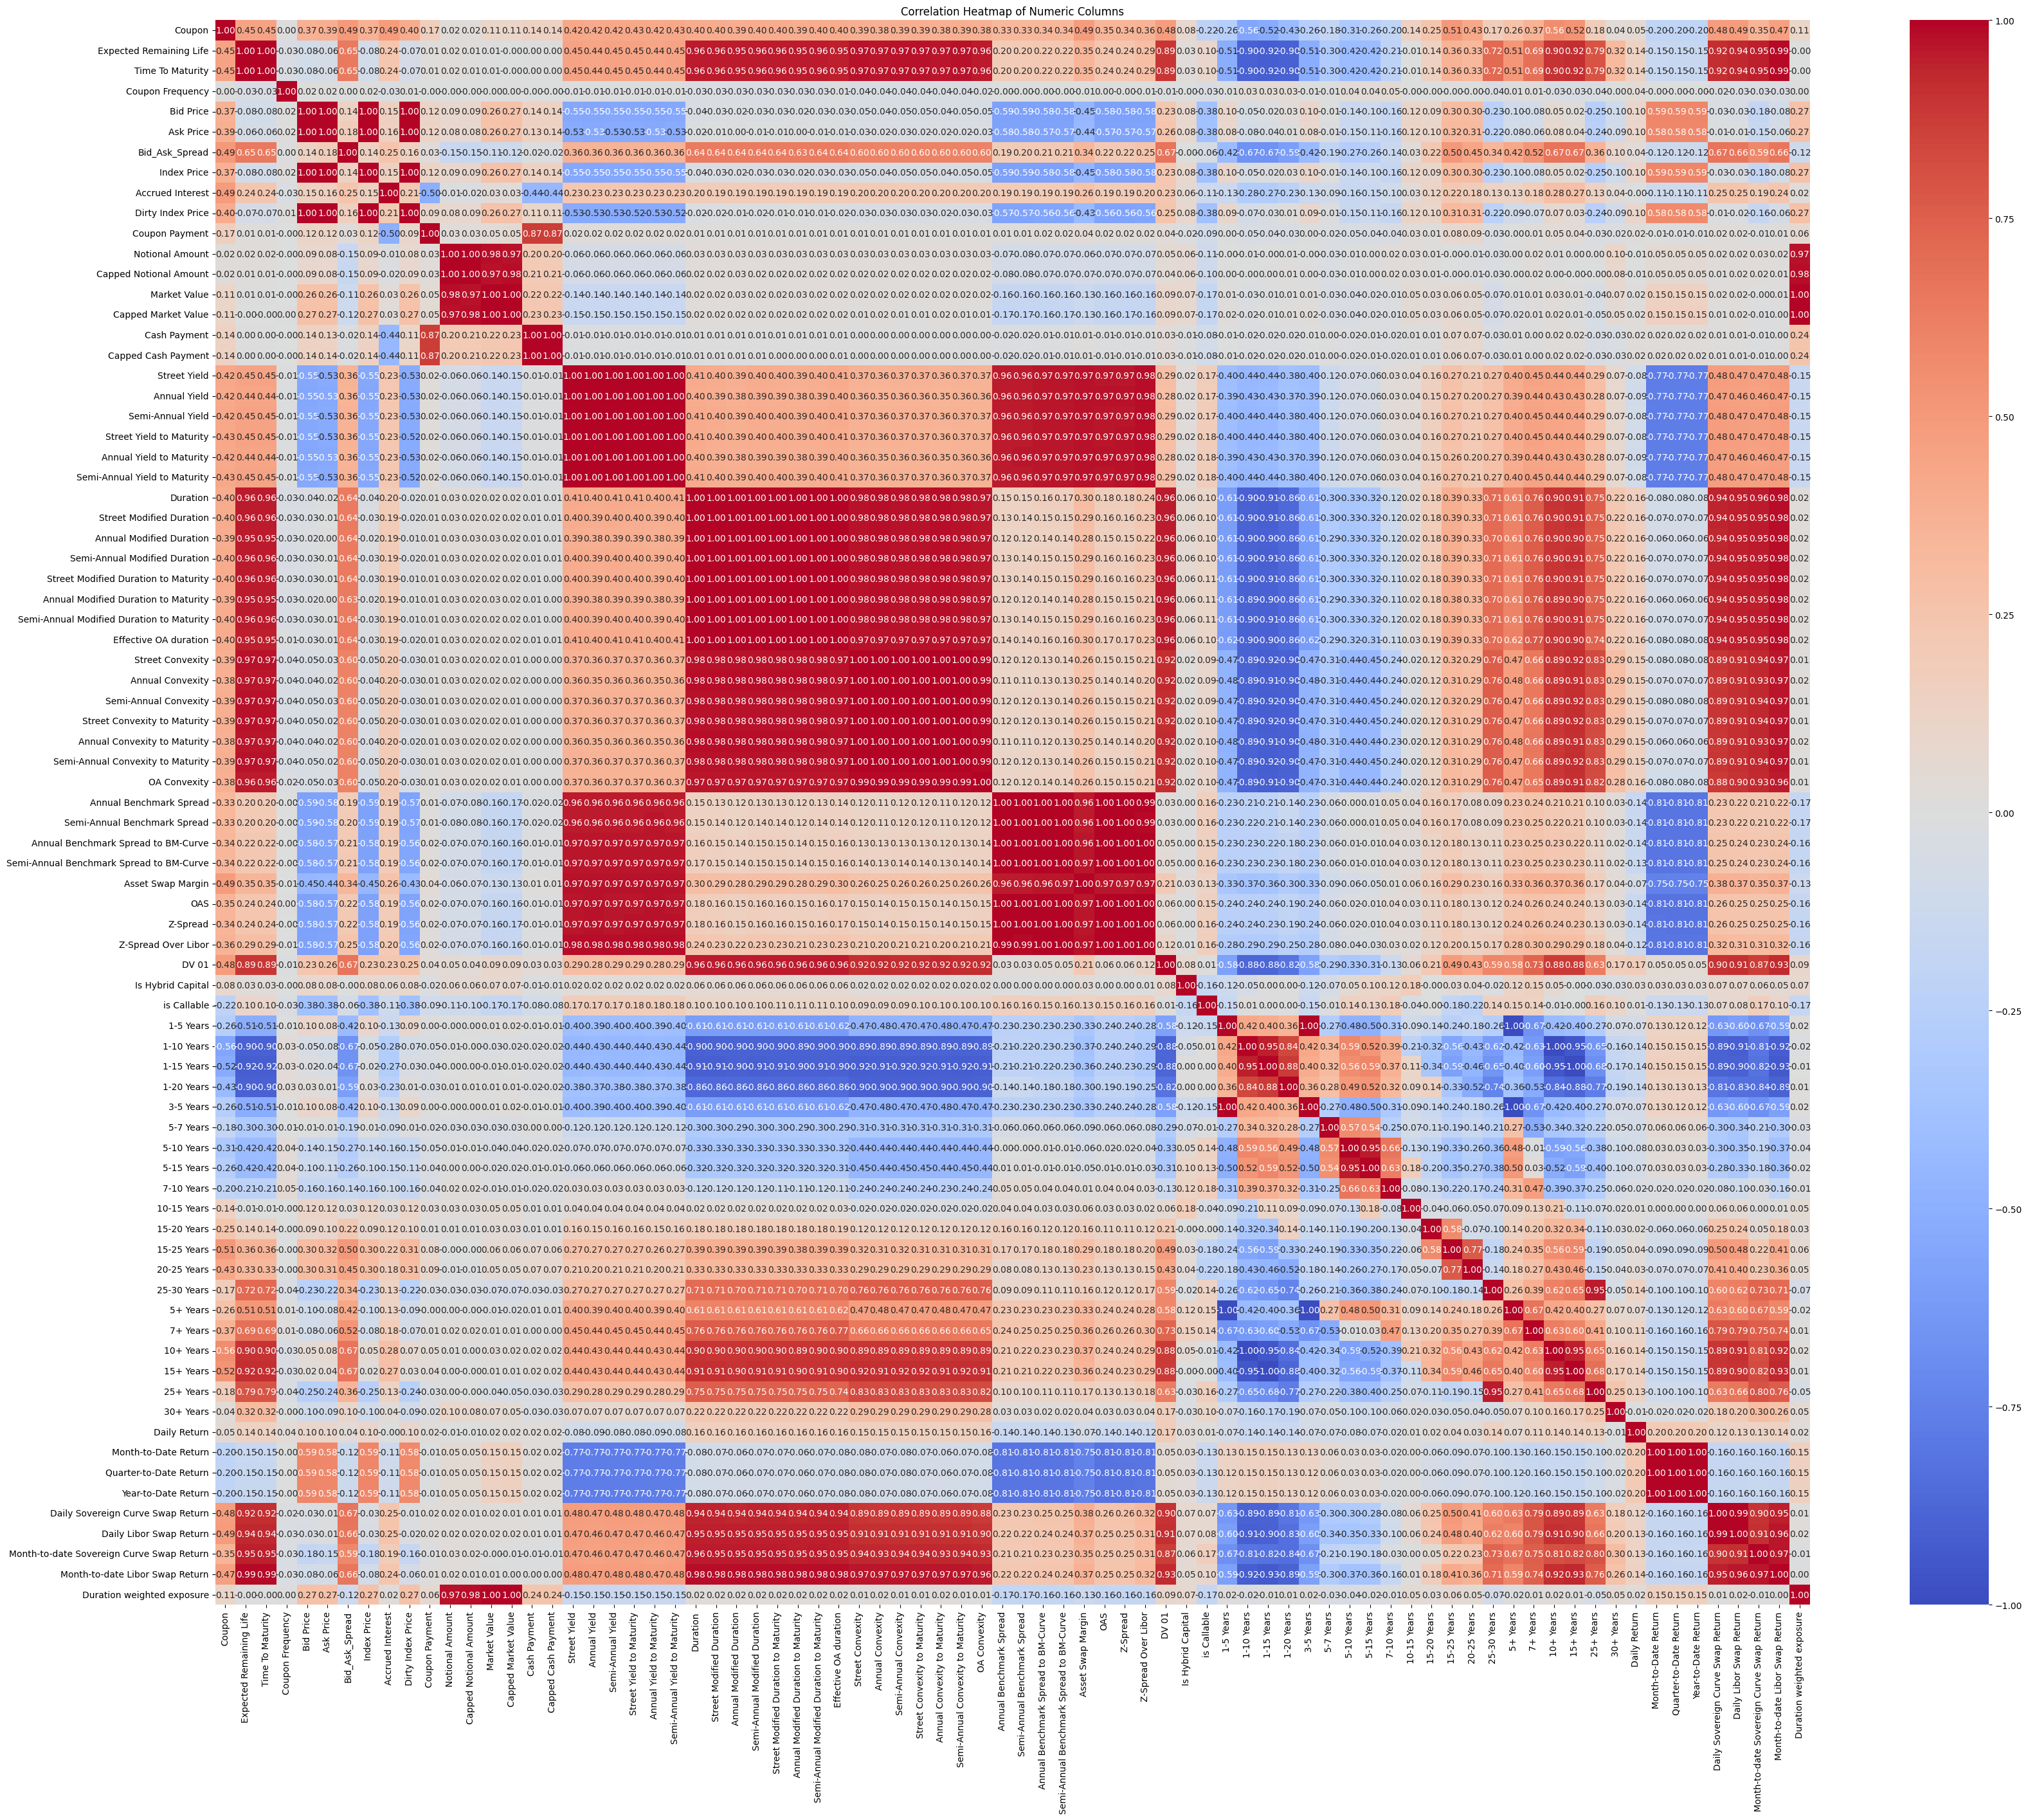

In [57]:
# numerical cols in multi_val_cols
numeric_cols = df[multi_val_cols].select_dtypes(include=['float64', 'int64']).columns

# calculate corr_matrix
corr_matrix = df[numeric_cols].corr()

# heat map
plt.figure(figsize=(40, 32))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Columns")
plt.savefig("./temp_plt.pdf")
plt.show()

In [58]:
high_corr = np.where((corr_matrix > 0.8) | (corr_matrix < -0.8))

# print high_corr pairs
for i, j in zip(high_corr[0], high_corr[1]):
    if i != j: # exclue itself
        print(f"high corr: {df.columns[i]} and {df.columns[j]}, corr: {corr_matrix.iloc[i, j]:.2f}")

high corr: Fixing and Price Type, corr: 1.00
high corr: Fixing and Bid Price, corr: 0.96
high corr: Fixing and Ask Price, corr: 0.96
high corr: Fixing and Bid_Ask_Spread, corr: 0.95
high corr: Fixing and Index Price, corr: 0.96
high corr: Fixing and Accrued Interest, corr: 0.96
high corr: Fixing and Dirty Index Price, corr: 0.95
high corr: Fixing and Ex-Dividend, corr: 0.96
high corr: Fixing and Coupon Payment, corr: 0.95
high corr: Fixing and Coupon Adjustment, corr: 0.97
high corr: Fixing and Current Redemption Payment, corr: 0.97
high corr: Fixing and Redemption Factor, corr: 0.97
high corr: Fixing and PIK Factor, corr: 0.97
high corr: Fixing and Notional Amount, corr: 0.97
high corr: Fixing and Capped Notional Amount, corr: 0.97
high corr: Fixing and Market Value, corr: 0.96
high corr: Fixing and Semi-Annual Yield to Maturity, corr: 0.89
high corr: Fixing and Street Modified Duration, corr: -0.90
high corr: Fixing and Annual Modified Duration, corr: -0.92
high corr: Fixing and Semi

# transfer the * Years columns back into catego

In [59]:
import pandas as pd

# Load the dataset
file_path = "iboxx_usd_lq_ig_eod_underlyings_20160125.csv"
df = pd.read_csv(file_path)

# Keep only ISIN from identification columns
df = df.drop(columns=['CUSIP', 'Identifier'], errors='ignore')

print(single_val_cols)

print(full_na_cols)

# # List of columns where all values are the same (to be removed)
# columns_to_remove_1 = ['Date',
#  'Fixing',
#  'Price Type',
#  'Index ISIN_CPi',
#  'Index ISIN_TRi',
#  'Index Name',
#  'Ex-Dividend',
#  'Coupon Adjustment',
#  'Current Redemption Payment',
#  'Redemption Factor',
#  'PIK Factor',
#  'Level 0',
#  'Level 2',
#  'Level 3',
#  'Seniority Level 3',
#  'Is Fixed to Float',
#  'Is Perpetual',
#  'Is Core index',
#  'Is Crossover',
#  'Is FRN',
#  'Is PIK',
#  'Is Zero Coupon',
#  'Is Sinking',
#  '1-3 Years']

# ## List of columns where all values are NA (to be removed)
# columns_to_remove_2 = ['FX Version', 'Local 1', 'Local 2', 'Next Call Date', 'Simple Margin', 'Discount Margin', 'Index Ratio', 'Assumed Inflation']


# Remove the unnecessary columns
df = df.drop(columns=single_val_cols, errors='ignore')
df = df.drop(columns=full_na_cols, errors='ignore')

# Save cleaned data
cleaned_file_path = "cleaned_iboxx_usd_lq_ig_eod.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")


['Date', 'Fixing', 'Price Type', 'Index ISIN_CPi', 'Index ISIN_TRi', 'Index Name', 'Ex-Dividend', 'Coupon Adjustment', 'Current Redemption Payment', 'Redemption Factor', 'PIK Factor', 'Level 0', 'Level 2', 'Level 3', 'Seniority Level 3', 'Is Fixed to Float', 'Is Perpetual', 'Is Core index', 'Is Crossover', 'Is FRN', 'Is PIK', 'Is Zero Coupon', 'Is Sinking', '1-3 Years']
['FX Version', 'Local 2', 'Simple Margin', 'Discount Margin', 'Index Ratio', 'Assumed Inflation']
Cleaned dataset saved to cleaned_iboxx_usd_lq_ig_eod.csv


Original dataset shape: (1482, 97)
Numeric data shape after filtering: (1482, 78)
Number of removed non-numeric columns: 19
Number of retained numeric columns: 78

Found 72 highly correlated feature pairs (correlation >= 0.999):
Expected Remaining Life and Time To Maturity with correlation: 1.000000
Bid Price and Ask Price with correlation: 0.999463
Bid Price and Index Price with correlation: 1.000000
Ask Price and Index Price with correlation: 0.999463
Capped Market Value and Duration weighted exposure with correlation: 0.999870
... and 67 more pairs

Grouped into 13 correlation groups:
Group 1: ['Expected Remaining Life', 'Time To Maturity']
Group 2: ['Ask Price', 'Bid Price', 'Index Price']
Group 3: ['Capped Market Value', 'Duration weighted exposure']
Group 4: ['Capped Cash Payment', 'Cash Payment']
Group 5: ['Annual Yield', 'Annual Yield to Maturity', 'Semi-Annual Yield', 'Semi-Annual Yield to Maturity', 'Street Yield']...
... and 8 more groups

SUMMARY OF IDENTICAL FEATURES:
Foun

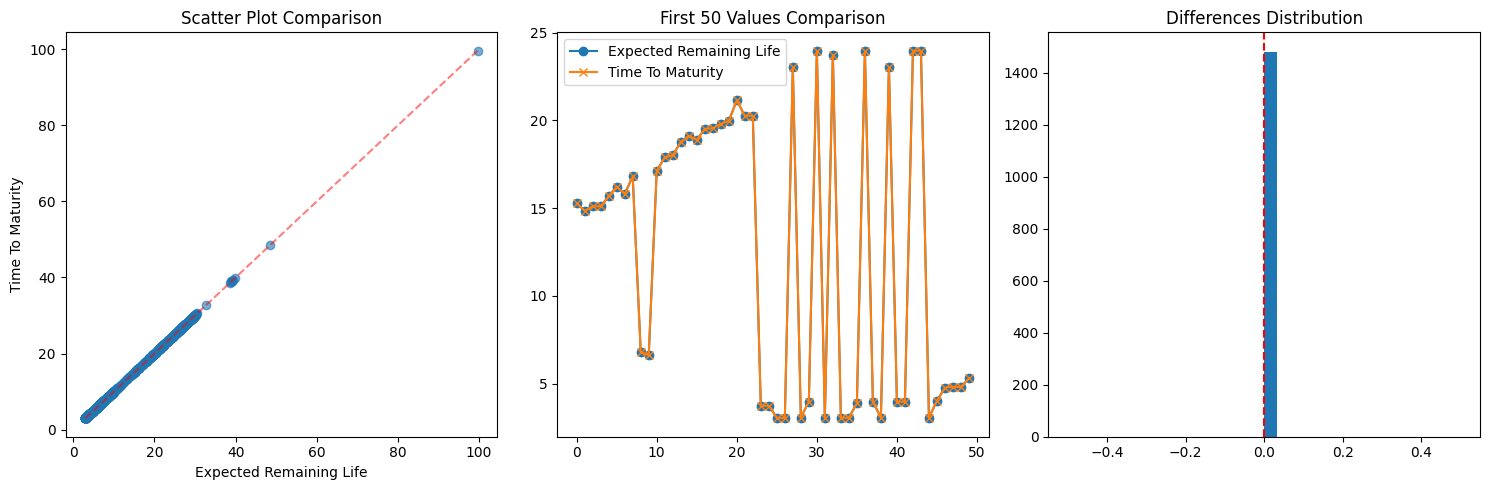


Analysis of Bid Price and Ask Price relationship:
  - Correlation: 0.999463
  - Are features identical: False
  - Mean Absolute Difference (MAD): 0.516719
  - Cosine Similarity: 0.999992
  - Scaling Relationship: False
    * Mean Ratio: 1.005154, Std Dev: 0.004018
  - Shift Relationship: False
    * Mean Difference: 0.516719, Std Dev: 0.401812
  - Relationship Type: Complex Relationship


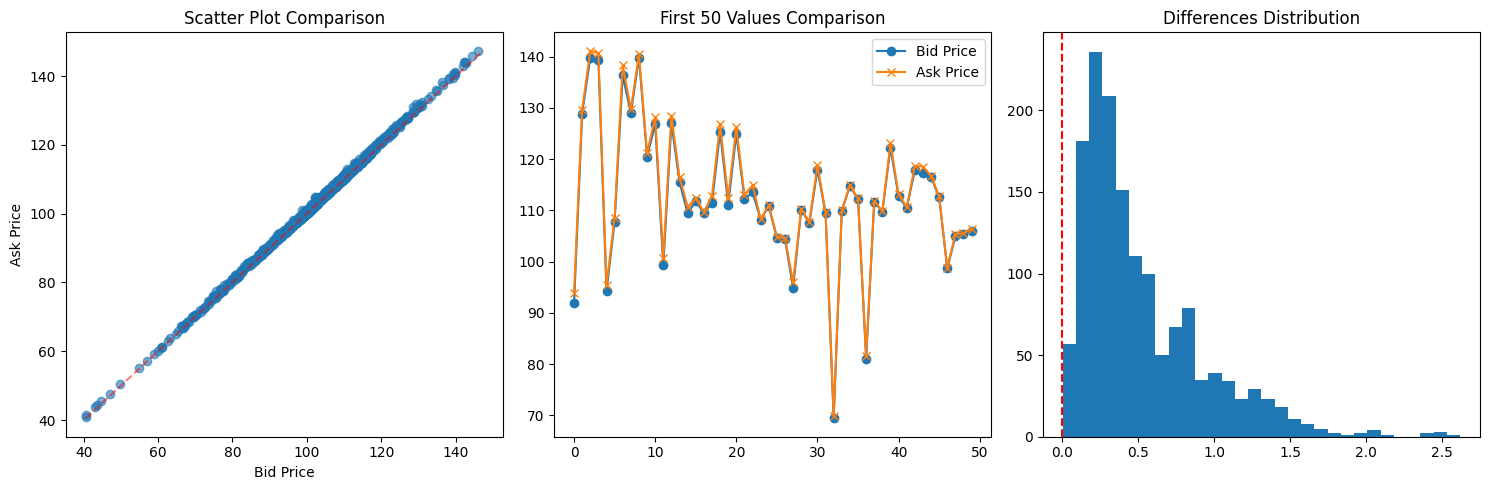


Analysis of Capped Market Value and Duration weighted exposure relationship:
  - Correlation: 0.999870
  - Are features identical: False
  - Mean Absolute Difference (MAD): 1397889705.379916
  - Cosine Similarity: 0.999966
  - Scaling Relationship: True
    * Scaling Factor: 0.000000
  - Shift Relationship: False
    * Mean Difference: -1397889705.379916, Std Dev: 827384706.986265
  - Relationship Type: Scaling Relationship (y ≈ 0.0000x)


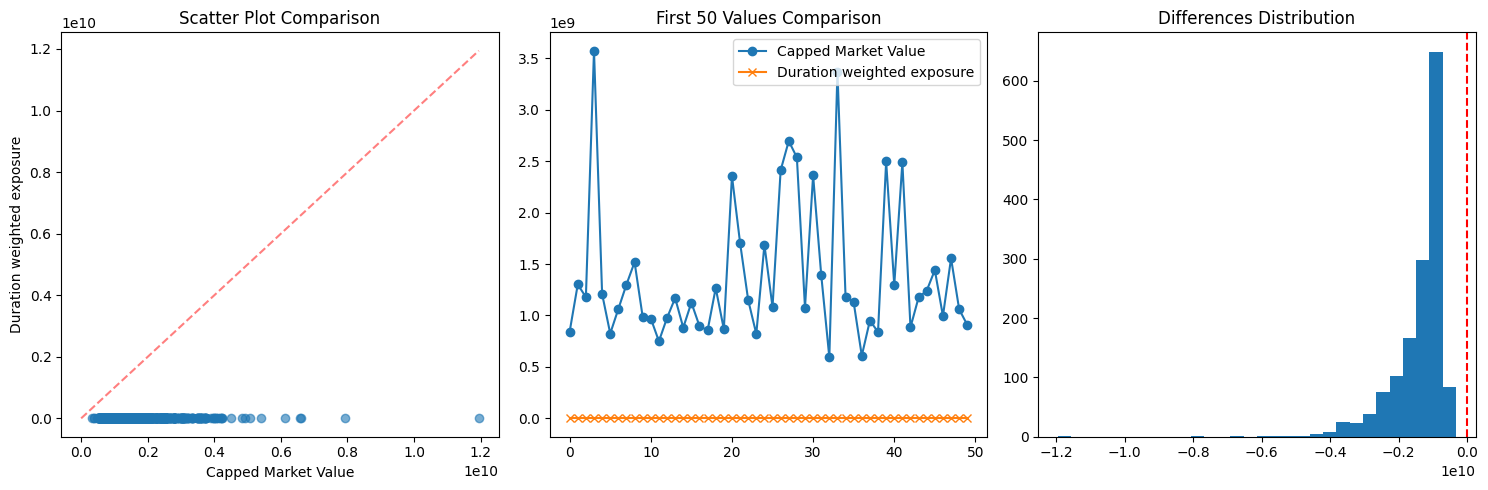


SUMMARY OF ALL FEATURES TO BE REMOVED WITH REASONS:
1. 1-10 Years
   Reason: scaled version of 10+ Years (factor: 0.0000)
2. 1-15 Years
   Reason: scaled version of 15+ Years (factor: 0.0000)
3. 3-5 Years
   Reason: 100% identical to 1-5 Years
4. 5+ Years
   Reason: scaled version of 1-5 Years (factor: 0.0000)
5. Duration weighted exposure
   Reason: scaled version of Capped Market Value (factor: 0.0000)
6. Index Price
   Reason: 100% identical to Bid Price
7. Month-to-Date Return
   Reason: practically identical to Quarter-to-Date Return (MAD: 0.000062)
8. Semi-Annual Modified Duration
   Reason: practically identical to Street Modified Duration (MAD: 0.000275)
9. Semi-Annual Modified Duration to Maturity
   Reason: practically identical to Street Modified Duration to Maturity (MAD: 0.000275)
10. Semi-Annual Yield
   Reason: practically identical to Street Yield (MAD: 0.000042)
11. Semi-Annual Yield to Maturity
   Reason: practically identical to Street Yield to Maturity (MAD: 0.0000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def analyze_feature_correlations(file_path, threshold=0.999, visualize_all=False, max_pairs_to_visualize=5, domain_knowledge=None):
    """
    Analyze feature correlations and identify redundant features
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    threshold : float, default=0.999
        Correlation threshold to identify highly correlated features
    visualize_all : bool, default=False
        If True, visualize all highly correlated pairs, otherwise only visualize a few examples
    max_pairs_to_visualize : int, default=5
        Maximum number of pairs to visualize when visualize_all=False
    domain_knowledge : dict, default=None
        Dictionary containing domain-specific information:
        - 'categorical_features': list of feature names that should be treated as categorical
        - 'feature_groups': dict of feature groups that should be analyzed separately
    
    Returns:
    --------
    remove_candidates : list
        List of features that can be safely removed
    """
    # Initialize domain knowledge if not provided
    if domain_knowledge is None:
        domain_knowledge = {
            'categorical_features': [],
            'feature_groups': {}
        }
    
    # Default categorical features related to bond terms if not specified
    default_term_features = [
        '1-3 Years', '1-5 Years', '1-10 Years', '1-15 Years', '1-20 Years', 
        '3-5 Years', '5-7 Years', '5-10 Years', '7-10 Years', '7+ Years',
        '10+ Years', '10-15 Years', '15+ Years', '15-20 Years', '15-25 Years',
        '20+ Years', '20-25 Years', '25+ Years', '25-30 Years', '30+ Years'
    ]
    
    # Add default term features to categorical features if they exist in data
    domain_knowledge['categorical_features'] = list(set(
        domain_knowledge['categorical_features'] + default_term_features
    ))
    # Load the cleaned data
    df = pd.read_csv(file_path)
    
    print(f"Original dataset shape: {df.shape}")
    
    # Filter out non-numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    df_numeric = df[numeric_cols]
    
    print(f"Numeric data shape after filtering: {df_numeric.shape}")
    print(f"Number of removed non-numeric columns: {df.shape[1] - df_numeric.shape[1]}")
    print(f"Number of retained numeric columns: {len(numeric_cols)}")
    
    # Calculate correlation matrix for numeric columns
    correlation_matrix = df_numeric.corr()
    
    # Find feature pairs with correlation >= threshold (excluding self-correlations)
    perfect_corr_pairs = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                perfect_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
    
    print(f"\nFound {len(perfect_corr_pairs)} highly correlated feature pairs (correlation >= {threshold}):")
    for pair in perfect_corr_pairs[:5]:  # Only show first 5 pairs
        print(f"{pair[0]} and {pair[1]} with correlation: {correlation_matrix.loc[pair[0], pair[1]]:.6f}")
    if len(perfect_corr_pairs) > 5:
        print(f"... and {len(perfect_corr_pairs) - 5} more pairs")
    
    # Group features that are all highly correlated with each other
    def find_correlation_groups(pairs):
        """Group features that are all highly correlated with each other"""
        if not pairs:
            return []
        
        # Create a graph representation
        graph = {}
        for feat1, feat2 in pairs:
            if feat1 not in graph:
                graph[feat1] = []
            if feat2 not in graph:
                graph[feat2] = []
            graph[feat1].append(feat2)
            graph[feat2].append(feat1)
        
        # Find connected components (groups of correlated features)
        visited = set()
        groups = []
        
        for node in graph:
            if node not in visited:
                group = []
                queue = [node]
                visited.add(node)
                
                while queue:
                    current = queue.pop(0)
                    group.append(current)
                    
                    for neighbor in graph[current]:
                        if neighbor not in visited:
                            visited.add(neighbor)
                            queue.append(neighbor)
                
                groups.append(sorted(group))
        
        return groups
    
    correlation_groups = find_correlation_groups(perfect_corr_pairs)
    print(f"\nGrouped into {len(correlation_groups)} correlation groups:")
    for i, group in enumerate(correlation_groups[:5]):  # Show first 5 groups
        print(f"Group {i+1}: {group[:5]}{'...' if len(group) > 5 else ''}")
    if len(correlation_groups) > 5:
        print(f"... and {len(correlation_groups) - 5} more groups")
    
    # If there are highly correlated feature pairs, perform detailed analysis
    if perfect_corr_pairs:
        # Define functions to calculate various similarity metrics
        def calculate_mad(x, y):
            """Calculate Mean Absolute Difference"""
            return np.mean(np.abs(x - y))
        
        def check_scaling(x, y, feature1, feature2, categorical_features):
            """
            Check if there's a scaling relationship, with special handling for categorical features
            """
            # If either feature is categorical, they shouldn't have a scaling relationship
            if feature1 in categorical_features or feature2 in categorical_features:
                return {"mean_ratio": np.nan, "std_ratio": np.nan, "is_scaled": False}
            
            # For non-categorical features, check scaling as before
            nonzero_mask = (x != 0)
            if nonzero_mask.sum() == 0:
                return {"mean_ratio": np.nan, "std_ratio": np.nan, "is_scaled": False}
            
            ratios = y[nonzero_mask] / x[nonzero_mask]
            mean_ratio = np.mean(ratios)
            std_ratio = np.std(ratios)
            is_scaled = std_ratio < 0.0001
            
            return {"mean_ratio": mean_ratio, "std_ratio": std_ratio, "is_scaled": is_scaled}
        
        def check_shift(x, y, feature1, feature2, categorical_features):
            """
            Check if there's a shift relationship, with special handling for categorical features
            """
            # If either feature is categorical, they shouldn't have a shift relationship
            if feature1 in categorical_features or feature2 in categorical_features:
                return {"mean_diff": np.nan, "std_diff": np.nan, "is_shifted": False}
            
            # For non-categorical features, check shift as before
            diffs = y - x
            mean_diff = np.mean(diffs)
            std_diff = np.std(diffs)
            is_shifted = std_diff < 0.0001
            
            return {"mean_diff": mean_diff, "std_diff": std_diff, "is_shifted": is_shifted}
        
        def calculate_cosine_similarity(x, y):
            """Calculate cosine similarity"""
            return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
        
        def are_features_identical(x, y, tolerance=1e-10):
            """Check if two features are identical within a small tolerance"""
            return np.allclose(x, y, rtol=tolerance, atol=tolerance)
        
        # First, quickly identify all identical features for a summary
        identical_pairs = []
        for feature1, feature2 in perfect_corr_pairs:
            x = df_numeric[feature1].values
            y = df_numeric[feature2].values
            is_identical = are_features_identical(x, y)
            identical_pairs.append((feature1, feature2, is_identical))
        
        truly_identical = [pair for pair in identical_pairs if pair[2]]
        
        # Print summary of identical features first
        print("\n" + "="*80)
        print("SUMMARY OF IDENTICAL FEATURES:")
        print("="*80)
        
        if truly_identical:
            print(f"Found {len(truly_identical)} pairs of completely identical features:")
            for feature1, feature2, _ in truly_identical[:10]:
                print(f"  - {feature1} and {feature2} are 100% identical (can safely remove one)")
            if len(truly_identical) > 10:
                print(f"  - ... and {len(truly_identical) - 10} more pairs")
            
            # Create a network of identical features to find redundant groups
            feat_graph = {}
            for feat1, feat2, _ in truly_identical:
                if feat1 not in feat_graph:
                    feat_graph[feat1] = []
                if feat2 not in feat_graph:
                    feat_graph[feat2] = []
                feat_graph[feat1].append(feat2)
                feat_graph[feat2].append(feat1)
            
            # Find connected components (groups of identical features)
            visited = set()
            identical_groups = []
            
            for node in feat_graph:
                if node not in visited:
                    group = []
                    queue = [node]
                    visited.add(node)
                    
                    while queue:
                        current = queue.pop(0)
                        group.append(current)
                        
                        for neighbor in feat_graph[current]:
                            if neighbor not in visited:
                                visited.add(neighbor)
                                queue.append(neighbor)
                    
                    if len(group) > 1:  # Only include groups with more than one feature
                        identical_groups.append(sorted(group))
            
            # Print groups of identical features
            if identical_groups:
                print("\nGroups of identical features:")
                for i, group in enumerate(identical_groups[:5]):
                    print(f"  Group {i+1}: {group[:5]}{'...' if len(group) > 5 else ''}")
                    print(f"    → Keep one feature (e.g., {group[0]}) and remove the others ({', '.join(group[1:5])}{'...' if len(group) > 5 else ''})")
                if len(identical_groups) > 5:
                    print(f"  ... and {len(identical_groups) - 5} more groups")
        else:
            print("No completely identical features found. All highly correlated features have some differences.")
        
        # Analyze each pair of highly correlated features
        detailed_results = []
        
        for pair in perfect_corr_pairs:
            feature1, feature2 = pair
            x = df_numeric[feature1].values
            y = df_numeric[feature2].values
            
            # Check if features are identical
            identical = are_features_identical(x, y)
            
            # Collect various metrics
            mad = calculate_mad(x, y)
            scaling_info = check_scaling(x, y, feature1, feature2, domain_knowledge['categorical_features'])
            shift_info = check_shift(x, y, feature1, feature2, domain_knowledge['categorical_features'])
            cosine_sim = calculate_cosine_similarity(x, y)
            
            result = {
                "feature1": feature1,
                "feature2": feature2,
                "correlation": correlation_matrix.loc[feature1, feature2],
                "identical": identical,
                "mad": mad,
                "cosine_similarity": cosine_sim,
                "scaling_info": scaling_info,
                "shift_info": shift_info
            }
            
            detailed_results.append(result)
        
        # Generate comprehensive analysis summary
        def generate_comprehensive_summary(detailed_results, correlation_groups):
            """Generate a comprehensive analysis summary"""
            print("\n" + "="*80)
            print("COMPREHENSIVE ANALYSIS SUMMARY")
            print("="*80)
            
            # Summary statistics
            total_pairs = len(detailed_results)
            identical_pairs = sum(1 for r in detailed_results if r['identical'])
            practically_identical = sum(1 for r in detailed_results if not r['identical'] and r['mad'] < 0.001)
            scaled_pairs = sum(1 for r in detailed_results if r['scaling_info']['is_scaled'] and not r['shift_info']['is_shifted'])
            shifted_pairs = sum(1 for r in detailed_results if r['shift_info']['is_shifted'] and not r['scaling_info']['is_scaled'])
            linear_pairs = sum(1 for r in detailed_results if r['scaling_info']['is_scaled'] and r['shift_info']['is_shifted'])
            complex_pairs = total_pairs - identical_pairs - practically_identical - scaled_pairs - shifted_pairs - linear_pairs
            
            print(f"Total analyzed feature pairs: {total_pairs}")
            print(f"  - Completely identical pairs: {identical_pairs}")
            print(f"  - Practically identical pairs: {practically_identical}")
            print(f"  - Scaling relationship pairs: {scaled_pairs}")
            print(f"  - Shift relationship pairs: {shifted_pairs}")
            print(f"  - Linear relationship pairs (both scaled and shifted): {linear_pairs}")
            print(f"  - Complex relationship pairs: {complex_pairs}")
            
            # Correlation distribution
            correlations = [r['correlation'] for r in detailed_results]
            print(f"\nCorrelation distribution:")
            print(f"  - Min correlation: {min(correlations):.6f}")
            print(f"  - Max correlation: {max(correlations):.6f}")
            print(f"  - Average correlation: {np.mean(correlations):.6f}")
            print(f"  - Median correlation: {np.median(correlations):.6f}")
            
            # Feature removal recommendations
            remove_candidates = []
            keep_candidates = []
            
            # Handle identical feature groups first
            visited_features = set()
            for group in identical_groups:
                if not group:
                    continue
                    
                # Keep the first feature in the group, remove others
                keep_feature = group[0]
                keep_candidates.append(keep_feature)
                visited_features.add(keep_feature)
                
                for feat in group[1:]:
                    if feat not in visited_features:
                        remove_candidates.append(feat)
                        visited_features.add(feat)
            
            # Then handle practically identical or scaled/shifted features
            for r in detailed_results:
                feature1, feature2 = r['feature1'], r['feature2']
                
                # Skip if both features have been processed
                if feature1 in visited_features and feature2 in visited_features:
                    continue
                
                if r['identical'] or r['mad'] < 0.001 or r['scaling_info']['is_scaled'] or r['shift_info']['is_shifted']:
                    # Choose which feature to keep (prefer shorter names, simpler names, or names already selected to keep)
                    if feature1 in keep_candidates or (feature2 not in keep_candidates and len(feature1) <= len(feature2)):
                        if feature2 not in visited_features:
                            remove_candidates.append(feature2)
                            visited_features.add(feature2)
                        if feature1 not in visited_features:
                            keep_candidates.append(feature1)
                            visited_features.add(feature1)
                    else:
                        if feature1 not in visited_features:
                            remove_candidates.append(feature1)
                            visited_features.add(feature1)
                        if feature2 not in visited_features:
                            keep_candidates.append(feature2)
                            visited_features.add(feature2)
            
            # Remove duplicates and ensure no feature is both kept and removed
            keep_candidates = list(set(keep_candidates))
            remove_candidates = [feat for feat in remove_candidates if feat not in keep_candidates]
            
            print(f"\nFeature Reduction Recommendations:")
            print(f"  - Total features: {len(df_numeric.columns)}")
            print(f"  - Suggested features to keep: {len(keep_candidates)}")
            print(f"  - Suggested features to remove: {len(remove_candidates)}")
            
            if remove_candidates:
                print("\nFeatures to remove:")
                for i, feat in enumerate(sorted(remove_candidates)):
                    print(f"  {i+1}. {feat}")
            
            # Find what features to remove from each correlation group with detailed reasons
            print("\nCorrelation group analysis with removal reasons:")
            for i, group in enumerate(correlation_groups):  # Analyze all groups
                if len(group) > 1:
                    remove_from_group = [feat for feat in group if feat in remove_candidates]
                    keep_from_group = [feat for feat in group if feat not in remove_candidates]
                    
                    print(f"  Group {i+1} ({len(group)} features):")
                    if len(keep_from_group) > 0:
                        print(f"    * Keep: {', '.join(keep_from_group)}")
                    if len(remove_from_group) > 0:
                        print(f"    * Remove: {', '.join(remove_from_group)}")
                    
                    # Analyze and explain removal reasons for each pair in the group
                    print("    * Removal reasons:")
                    for feat_remove in remove_from_group:
                        for feat_keep in keep_from_group:
                            # Find the corresponding analysis result
                            pair_found = False
                            for result in detailed_results:
                                if (result['feature1'] == feat_keep and result['feature2'] == feat_remove) or \
                                   (result['feature1'] == feat_remove and result['feature2'] == feat_keep):
                                    pair_found = True
                                    
                                    # Get the right order of features for explanation
                                    if result['feature1'] == feat_remove:
                                        f_remove, f_keep = result['feature1'], result['feature2']
                                    else:
                                        f_remove, f_keep = result['feature2'], result['feature1']
                                    
                                    # Generate reason based on relationship
                                    reason = f"      - {f_remove} can be removed because it "
                                    
                                    if result['identical']:
                                        reason += f"is 100% identical to {f_keep}"
                                    elif result['mad'] < 0.001:
                                        reason += f"is practically identical to {f_keep} (MAD: {result['mad']:.6f})"
                                    elif result['scaling_info']['is_scaled'] and not result['shift_info']['is_shifted']:
                                        reason += f"is a scaled version of {f_keep} "
                                        reason += f"(scaling factor: {result['scaling_info']['mean_ratio']:.4f})"
                                    elif result['shift_info']['is_shifted'] and not result['scaling_info']['is_scaled']:
                                        reason += f"is a shifted version of {f_keep} "
                                        reason += f"(shift amount: {result['shift_info']['mean_diff']:.4f})"
                                    elif result['scaling_info']['is_scaled'] and result['shift_info']['is_shifted']:
                                        reason += f"has a linear relationship with {f_keep} "
                                        reason += f"(y = {result['scaling_info']['mean_ratio']:.4f}x + {result['shift_info']['mean_diff']:.4f})"
                                    else:
                                        reason += f"is highly correlated with {f_keep} (r = {result['correlation']:.6f})"
                                    
                                    print(reason)
                                    break
                            
                            if pair_found:
                                break  # Found at least one explanation, move to next feature
            
            print("\nDetailed relationship breakdown:")
            relationship_types = {}
            for r in detailed_results:
                feature1, feature2 = r['feature1'], r['feature2']
                
                if r['identical']:
                    relationship = "Identical"
                elif r['mad'] < 0.001:
                    relationship = "Practically Identical"
                elif r['scaling_info']['is_scaled'] and not r['shift_info']['is_shifted']:
                    relationship = "Scaling Relationship"
                elif r['shift_info']['is_shifted'] and not r['scaling_info']['is_scaled']:
                    relationship = "Shift Relationship"
                elif r['scaling_info']['is_scaled'] and r['shift_info']['is_shifted']:
                    relationship = "Linear Relationship (ax+b)"
                else:
                    relationship = "Complex Relationship"
                
                if relationship not in relationship_types:
                    relationship_types[relationship] = []
                relationship_types[relationship].append((feature1, feature2))
            
            for rel_type, pairs in relationship_types.items():
                print(f"  - {rel_type}: {len(pairs)} pairs")
                for feat1, feat2 in pairs[:3]:  # Show just first 3 examples
                    print(f"    * {feat1} - {feat2}")
                if len(pairs) > 3:
                    print(f"    * ... and {len(pairs)-3} more pairs")
            
            return remove_candidates, keep_candidates
        
        # Generate the comprehensive summary
        remove_candidates, keep_candidates = generate_comprehensive_summary(detailed_results, correlation_groups)
        
        # Select which pairs to visualize
        pairs_to_visualize = []
        if visualize_all:
            pairs_to_visualize = detailed_results
        else:
            # Create a dictionary to store one example of each relationship type
            relationship_examples = {}
            
            for result in detailed_results:
                # Determine relationship type
                if result['identical']:
                    relationship = "Identical"
                elif result['mad'] < 0.001:
                    relationship = "Practically Identical"
                elif result['scaling_info']['is_scaled'] and not result['shift_info']['is_shifted']:
                    relationship = "Scaling Relationship"
                elif result['shift_info']['is_shifted'] and not result['scaling_info']['is_scaled']:
                    relationship = "Shift Relationship"
                elif result['scaling_info']['is_scaled'] and result['shift_info']['is_shifted']:
                    relationship = "Linear Relationship (ax+b)"
                else:
                    relationship = "Complex Relationship"
                
                # Store one example of each relationship type
                if relationship not in relationship_examples:
                    relationship_examples[relationship] = result
            
            # Add one example of each relationship type to visualize
            pairs_to_visualize = list(relationship_examples.values())
            
            # Limit to max_pairs_to_visualize
            pairs_to_visualize = pairs_to_visualize[:max_pairs_to_visualize]
        
        # Print detailed results and visualize selected pairs
        for result in pairs_to_visualize:
            print("\n" + "="*80)
            print(f"Analysis of {result['feature1']} and {result['feature2']} relationship:")
            print(f"  - Correlation: {result['correlation']:.6f}")
            print(f"  - Are features identical: {result['identical']}")
            print(f"  - Mean Absolute Difference (MAD): {result['mad']:.6f}")
            print(f"  - Cosine Similarity: {result['cosine_similarity']:.6f}")
            
            scaling = result["scaling_info"]
            print(f"  - Scaling Relationship: {scaling['is_scaled']}")
            if scaling["is_scaled"]:
                print(f"    * Scaling Factor: {scaling['mean_ratio']:.6f}")
            else:
                print(f"    * Mean Ratio: {scaling['mean_ratio']:.6f}, Std Dev: {scaling['std_ratio']:.6f}")
            
            shift = result["shift_info"]
            print(f"  - Shift Relationship: {shift['is_shifted']}")
            if shift["is_shifted"]:
                print(f"    * Shift Amount: {shift['mean_diff']:.6f}")
            else:
                print(f"    * Mean Difference: {shift['mean_diff']:.6f}, Std Dev: {shift['std_diff']:.6f}")
            
            # Determine relationship type
            relationship = "Undetermined"
            if result['identical']:
                relationship = "Identical"
            elif result['mad'] < 0.001:
                relationship = "Practically Identical"
            elif scaling["is_scaled"] and not shift["is_shifted"]:
                relationship = f"Scaling Relationship (y ≈ {scaling['mean_ratio']:.4f}x)"
            elif shift["is_shifted"] and not scaling["is_scaled"]:
                relationship = f"Shift Relationship (y ≈ x + {shift['mean_diff']:.4f})"
            elif scaling["is_scaled"] and shift["is_shifted"]:
                relationship = f"Linear Relationship (y ≈ {scaling['mean_ratio']:.4f}x + {shift['mean_diff']:.4f})"
            else:
                relationship = "Complex Relationship"
            
            print(f"  - Relationship Type: {relationship}")
            
            feature1, feature2 = result['feature1'], result['feature2']
            x = df_numeric[feature1].values
            y = df_numeric[feature2].values
            
            # Visualize comparison
            plt.figure(figsize=(15, 5))
            
            # Scatter plot
            plt.subplot(1, 3, 1)
            plt.scatter(x, y, alpha=0.6)
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.title('Scatter Plot Comparison')
            min_val = min(np.min(x), np.min(y))
            max_val = max(np.max(x), np.max(y))
            plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5)  # Add y=x reference line
            
            # First 50 points value comparison
            plt.subplot(1, 3, 2)
            idx = range(min(50, len(x)))
            plt.plot(idx, x[idx], 'o-', label=feature1)
            plt.plot(idx, y[idx], 'x-', label=feature2)
            plt.legend()
            plt.title('First 50 Values Comparison')
            
            # Differences distribution
            plt.subplot(1, 3, 3)
            diffs = y - x
            plt.hist(diffs, bins=30)
            plt.title('Differences Distribution')
            plt.axvline(x=0, color='r', linestyle='--')
            
            plt.tight_layout()
            plt.show()
        
        # Generate a summary table of all features to be removed with reasons
        print("\n" + "="*80)
        print("SUMMARY OF ALL FEATURES TO BE REMOVED WITH REASONS:")
        print("="*80)
        
        if remove_candidates:
            # Create a dictionary to store removal reasons
            removal_reasons = {}
            
            # For each feature to be removed, find the best reason
            for feat_remove in remove_candidates:
                # Find the best explanation (prefer identical > practically identical > scaling > shift > correlation)
                best_reason = None
                best_priority = -1
                
                for result in detailed_results:
                    if result['feature1'] == feat_remove or result['feature2'] == feat_remove:
                        # Get the other feature (the one we're keeping)
                        if result['feature1'] == feat_remove:
                            f_keep = result['feature2']
                        else:
                            f_keep = result['feature1']
                        
                        # Skip if the other feature is also being removed
                        if f_keep in remove_candidates:
                            continue
                        
                        # Check if either feature is categorical
                        is_categorical = (feat_remove in domain_knowledge['categorical_features'] or 
                                         f_keep in domain_knowledge['categorical_features'])
                        
                        # Determine relationship type and priority
                        priority = -1
                        if result['identical']:
                            relationship = f"100% identical to {f_keep}"
                            priority = 5
                        elif result['mad'] < 0.001:
                            relationship = f"practically identical to {f_keep} (MAD: {result['mad']:.6f})"
                            priority = 4
                        elif result['scaling_info']['is_scaled'] and not result['shift_info']['is_shifted'] and not is_categorical:
                            relationship = f"scaled version of {f_keep} (factor: {result['scaling_info']['mean_ratio']:.6f})"
                            priority = 3
                        elif result['shift_info']['is_shifted'] and not result['scaling_info']['is_scaled'] and not is_categorical:
                            relationship = f"shifted version of {f_keep} (shift: {result['shift_info']['mean_diff']:.6f})"
                            priority = 2
                        elif result['scaling_info']['is_scaled'] and result['shift_info']['is_shifted'] and not is_categorical:
                            relationship = f"linear transformation of {f_keep} (y = {result['scaling_info']['mean_ratio']:.6f}x + {result['shift_info']['mean_diff']:.6f})"
                            priority = 1
                        else:
                            relationship = f"highly correlated with {f_keep} (r = {result['correlation']:.6f})"
                            if is_categorical:
                                relationship += " (categorical feature)"
                            priority = 0
                        
                        # Update the best reason if this has higher priority
                        if priority > best_priority:
                            best_reason = relationship
                            best_priority = priority
                
                # Store the best reason
                removal_reasons[feat_remove] = best_reason if best_reason else "Unknown reason"
            
            # Print each feature and its removal reason
            for i, feat in enumerate(sorted(remove_candidates)):
                print(f"{i+1}. {feat}")
                print(f"   Reason: {removal_reasons[feat]}")
                # Add a warning for categorical features with scaling/shift relationships
                if "scaled version" in removal_reasons[feat] and feat in domain_knowledge['categorical_features']:
                    print(f"   WARNING: This is a categorical feature and should not have a scaling relationship!")
                if "shifted version" in removal_reasons[feat] and feat in domain_knowledge['categorical_features']:
                    print(f"   WARNING: This is a categorical feature and should not have a shift relationship!")
        else:
            print("No features recommended for removal.")
            
        # Return the list of features to remove
        return remove_candidates
    
    else:
        print("\nNo highly correlated features found with correlation >= {threshold}")
        return []

# Example usage
if __name__ == "__main__":
    # Replace with your file path
    file_path = "cleaned_iboxx_usd_lq_ig_eod.csv"
    
    # Define domain knowledge about the features
    domain_knowledge = {
        'categorical_features': [
            # Bond term features (categorical by nature)
            '1-3 Years', '1-5 Years', '1-10 Years', '1-15 Years', '1-20 Years', 
            '3-5 Years', '5-7 Years', '5-10 Years', '7-10 Years', '7+ Years',
            '10+ Years', '10-15 Years', '15+ Years', '15-20 Years', '15-25 Years',
            '20+ Years', '20-25 Years', '25+ Years', '25-30 Years', '30+ Years',
            # Add other categorical features as needed
            'is Callable', 'Asset Swap Margin', 'OAS'
        ],
        'feature_groups': {
            'term': [
                '1-3 Years', '1-5 Years', '1-10 Years', '1-15 Years', '1-20 Years', 
                '3-5 Years', '5-7 Years', '5-10 Years', '7-10 Years', '7+ Years',
                '10+ Years', '10-15 Years', '15+ Years', '15-20 Years', '15-25 Years',
                '20+ Years', '20-25 Years', '25+ Years', '25-30 Years', '30+ Years'
            ],
            'yield': [
                'Annual Yield', 'Annual Yield to Maturity', 'Semi-Annual Yield', 
                'Semi-Annual Yield to Maturity', 'Street Yield'
            ],
            'duration': [
                'Duration', 'Street Modified Duration', 'Street Modified Duration to Maturity',
                'Semi-Annual Modified Duration', 'Semi-Annual Modified Duration to Maturity'
            ]
        }
    }
    
    # Set visualize_all=False to only see examples of each relationship type
    # Set max_pairs_to_visualize to control how many examples to show
    redundant_features = analyze_feature_correlations(
        file_path, 
        threshold=0.999, 
        visualize_all=False,
        max_pairs_to_visualize=3,
        domain_knowledge=domain_knowledge
    )
    
    # Print features that can be removed in a format ready for code use
    if redundant_features:
        print("\n" + "="*80)
        print("Python code to remove redundant features:")
        print("="*80)
        print("# Remove redundant features")
        print("features_to_remove = [")
        for feature in redundant_features:
            print(f"    '{feature}',")
        print("]")
        print("df = df.drop(columns=features_to_remove)")
        print(f"# Reduced from {len(df.columns)} to {len(df.columns) - len(redundant_features)} features")